In [1]:
!wget https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD -O electric_cars.csv

--2024-07-05 20:31:56--  https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Resolving data.wa.gov (data.wa.gov)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.wa.gov (data.wa.gov)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘electric_cars.csv’

electric_cars.csv       [  <=>               ]  44.61M  6.98MB/s    in 6.6s    

2024-07-05 20:32:04 (6.73 MB/s) - ‘electric_cars.csv’ saved [46779871]



In [2]:
!ls  -l

total 49560
-rw-rw-r-- 1 sseltser sseltser   647565 Jul  5 20:31  analyze_electric_cars.ipynb
-rw-rw-r-- 1 sseltser sseltser   647565 Jul  5 19:32  analyze_us_food_imports.ipynb
-rw-rw-r-- 1 sseltser sseltser 46779871 Jun 18 10:15  electric_cars.csv
-rw-rw-r-- 1 sseltser sseltser  1327062 Apr 10 14:50  FoodImports.csv
-rw-rw-r-- 1 sseltser sseltser  1327062 Apr 10 14:50 'FoodImports.csv?v=6638'
-rw-rw-r-- 1 sseltser sseltser        0 Jul  5 16:01  __init__.py
-rw-rw-r-- 1 sseltser sseltser     1599 Jul  5 16:01  main.py
-rw-rw-r-- 1 sseltser sseltser       97 Jul  5 16:01  task-info.yaml
-rw-rw-r-- 1 sseltser sseltser     1753 Jul  5 16:01  task.md


In [4]:
import pandas as pd
e_cars = pd.read_csv("electric_cars.csv")
e_cars.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [23]:
print(f"percent of electric cars is {100*len(e_cars)/7.6e6}")

percent of electric cars is 2.518513157894737


<Axes: xlabel='Make'>

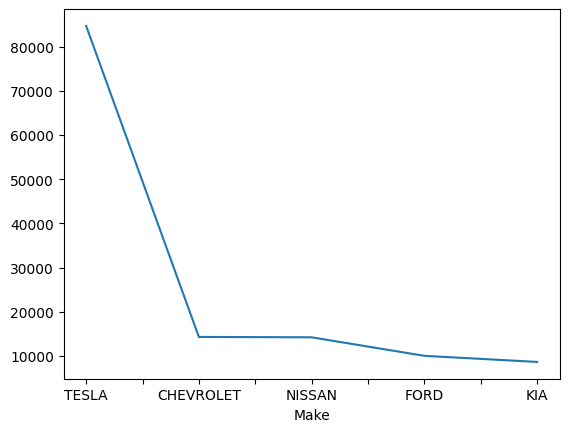

In [15]:
# top manufuctures#
e_cars.groupby("Make").size().sort_values(ascending=False)[:5].plot()

In [30]:
# tesla market share vs the others
e_cars[e_cars["Make"] == "TESLA"].groupby("Make").size()/len(e_cars)

Make
TESLA    0.442356
dtype: float64

In [36]:
# what is average distance by make
e_cars.groupby("Make")["Electric Range"].mean().sort_values(ascending=False)

Make
JAGUAR                  204.000000
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
CHEVROLET                94.139585
FIAT                     85.628681
NISSAN                   78.761781
TESLA                    73.131322
SMART                    62.084942
AZURE DYNAMICS           56.000000
AUDI                     47.332905
HONDA                    45.569428
PORSCHE                  44.820643
KIA                      40.927113
POLESTAR                 37.716720
BMW                      33.215063
ALFA ROMEO               33.000000
CHRYSLER                 32.188918
DODGE                    32.000000
MITSUBISHI               30.900602
TOYOTA                   27.728172
LAND ROVER               27.400000
MAZDA                    25.731497
LINCOLN                  23.590747
JEEP                     22.339071
VOLKSWAGEN               21.299001
LEXUS                    20.701940
BENTLEY                  19.666667
HYUNDAI                  18.363874
MINI           

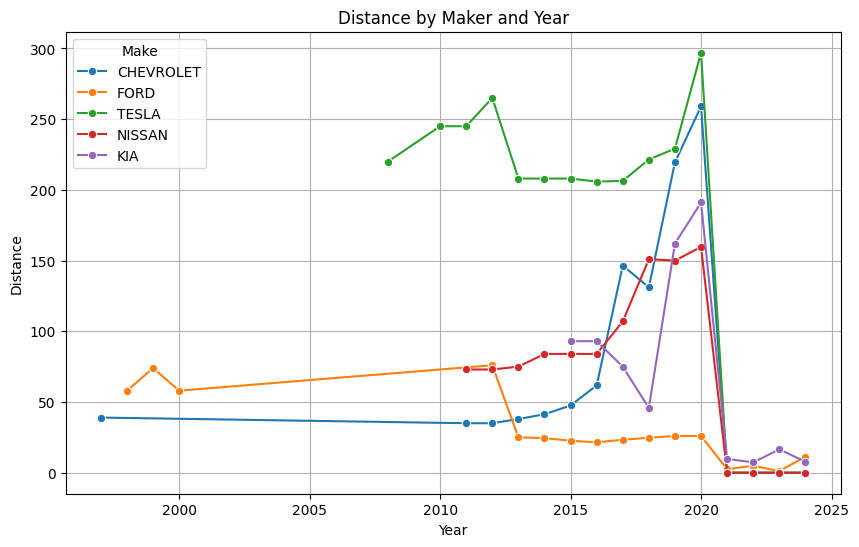

In [48]:
# how does tesla looks through time
mean_distance = e_cars.groupby(["Model Year","Make"])["Electric Range"].mean().reset_index()
mean_distance = mean_distance[mean_distance["Make"].str.contains("TESLA|FORD|CHEVROLET|KIA|NISSAN",regex=True)]
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_distance, x='Model Year', y='Electric Range', hue='Make', marker='o')

plt.title('Distance by Maker and Year')
plt.xlabel('Year')
plt.ylabel('Distance')
plt.legend(title='Make')
plt.grid(True)
plt.show()

In [43]:
mean_distance

Model Year  Make      
1997        CHEVROLET     39.000000
1998        FORD          58.000000
1999        FORD          74.000000
2000        FORD          58.000000
2002        TOYOTA        95.000000
                            ...    
2024        TOYOTA        33.169312
            VOLKSWAGEN     0.000000
            VOLVO         28.735245
2025        HYUNDAI        0.000000
            LEXUS         37.000000
Name: Electric Range, Length: 261, dtype: float64

In [50]:
#!pip install geopandas

/bin/bash: line 1: my_pip: command not found


In [69]:
e_cars[e_cars["State"] == "WA"].groupby(["State","City"]).size().sort_values(ascending=False)

State  City        
WA     Seattle         31436
       Bellevue         9581
       Redmond          6883
       Vancouver        6744
       Bothell          6278
                       ...  
       Bangor Base         1
       Sprague             1
       Bay Center          1
       Beaver              1
       Chelan Falls        1
Length: 477, dtype: int64